<a href="https://colab.research.google.com/github/JulverRMP/Visualizacion_Consumo_de_alcohol_en_paises_de_la_OCDE/blob/main/Ejercicio_de_visualizaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [96]:
data = '/content/drive/MyDrive/BOOTCAMP-DATA ANALYTICS/SEMANA03/OECD Alcohol Consumption per Capita.csv'
df = pd.read_csv(data)
df.head(10)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,LITRES/CAPITA,Flag Codes
0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN
5,AUS,ALCOHOL,TOT,LT_CAP15,A,1965,10.0,NaN
6,AUS,ALCOHOL,TOT,LT_CAP15,A,1966,10.3,NaN
7,AUS,ALCOHOL,TOT,LT_CAP15,A,1967,10.8,NaN
8,AUS,ALCOHOL,TOT,LT_CAP15,A,1968,11.1,NaN
9,AUS,ALCOHOL,TOT,LT_CAP15,A,1969,11.6,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOCATION       2751 non-null   object 
 1   INDICATOR      2751 non-null   object 
 2   SUBJECT        2751 non-null   object 
 3   MEASURE        2751 non-null   object 
 4   FREQUENCY      2751 non-null   object 
 5   TIME           2751 non-null   int64  
 6   LITRES/CAPITA  2751 non-null   float64
 7   Flag Codes     216 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 172.1+ KB


In [98]:
df['LOCATION'].value_counts()

CAN    63
IRL    63
NOR    63
CHE    62
HUN    62
USA    62
TUR    62
NLD    62
SVK    62
FIN    62
CRI    62
AUT    62
SWE    62
MEX    61
POL    61
KOR    61
GBR    61
ESP    60
ISL    60
CHN    59
IND    59
ISR    59
ZAF    59
COL    59
ARG    59
PER    59
IDN    59
ROU    59
PRT    59
JPN    59
DEU    59
LUX    59
ITA    59
DNK    58
AUS    58
GRC    57
CHL    57
BRA    57
BGR    57
BEL    57
NZL    55
FRA    52
LVA    42
CZE    42
SVN    41
HRV    33
EST    32
RUS    27
LTU    27
Name: LOCATION, dtype: int64

In [99]:
df['TIME'].value_counts()

2010    49
1999    49
2001    49
2002    49
2003    49
        ..
1961    32
2020    28
2021    27
1960    15
2022     5
Name: TIME, Length: 63, dtype: int64

In [100]:
df['MEASURE'].value_counts()

LT_CAP15    2751
Name: MEASURE, dtype: int64

In [101]:
df.nunique()

LOCATION          49
INDICATOR          1
SUBJECT            1
MEASURE            1
FREQUENCY          1
TIME              63
LITRES/CAPITA    207
Flag Codes         4
dtype: int64

In [102]:
df['INDICATOR'].value_counts()

ALCOHOL    2751
Name: INDICATOR, dtype: int64

In [103]:
df['SUBJECT'].value_counts()

TOT    2751
Name: SUBJECT, dtype: int64

In [104]:
df['MEASURE'].value_counts()

LT_CAP15    2751
Name: MEASURE, dtype: int64

In [106]:
df['FREQUENCY'].value_counts()

A    2751
Name: FREQUENCY, dtype: int64

Debido a que 4 columnas solo presentan 1 solo tipo de datos, se procede a eliminarlos ya que son constantes.

In [107]:
df.drop(columns=['INDICATOR', 'SUBJECT','MEASURE' ,'FREQUENCY' ], inplace=True)

In [108]:
(df['Flag Codes'].isnull().sum()/2751)*100

92.14830970556162

Se elimina la columna 'Flag Codes' debido a que presentan el 92% de datos nulos

In [109]:
df.drop(columns=['Flag Codes' ], inplace=True)

In [110]:
df

,LOCATION,TIME,LITRES/CAPITA
0,AUS,1960,9.3
1,AUS,1961,9.4
2,AUS,1962,9.5
3,AUS,1963,9.8
4,AUS,1964,10.1
...,...,...,...
2746,ROU,2015,9.5
2747,ROU,2016,9.6
2748,ROU,2017,10.1
2749,ROU,2018,11.0


In [111]:
df.nunique()

LOCATION          49
TIME              63
LITRES/CAPITA    207
dtype: int64

Debido a que se cuenta con 49 paises, se toma de referencia para la visualización, los 10 primeros paises con el mayor promedio de Litres/Capita .

In [112]:
top10=df.groupby(['LOCATION'])[['LITRES/CAPITA']].mean().sort_values(by='LITRES/CAPITA', ascending=False).reset_index()
top10=top10.head(10)
top10

,LOCATION,LITRES/CAPITA
0,RUS,16.796296
1,FRA,15.832692
2,LUX,15.147458
3,PRT,13.952542
4,DEU,13.583051
5,ESP,13.190000
6,ITA,12.698305
7,AUT,12.650000
8,SVN,12.534146
9,ARG,12.283051


In [113]:
lisn1=list(top10['LOCATION'])
lisn1

['RUS', 'FRA', 'LUX', 'PRT', 'DEU', 'ESP', 'ITA', 'AUT', 'SVN', 'ARG']

In [114]:
df_top10=df[df.LOCATION.isin(lisn1)]
df_top10

,LOCATION,TIME,LITRES/CAPITA
58,AUT,1960,8.8
59,AUT,1961,9.4
60,AUT,1962,9.4
61,AUT,1963,10.1
62,AUT,1964,10.7
...,...,...,...
2538,ARG,2015,8.5
2539,ARG,2016,8.4
2540,ARG,2017,8.3
2541,ARG,2018,8.0


In [138]:
fig = px.line(df_top10, x="TIME", y="LITRES/CAPITA", color="LOCATION",
          hover_name="LOCATION", log_x=True,markers=True,symbol="LOCATION",title="Top 10 Paises con Mayor Litres/Capita")
fig.show()

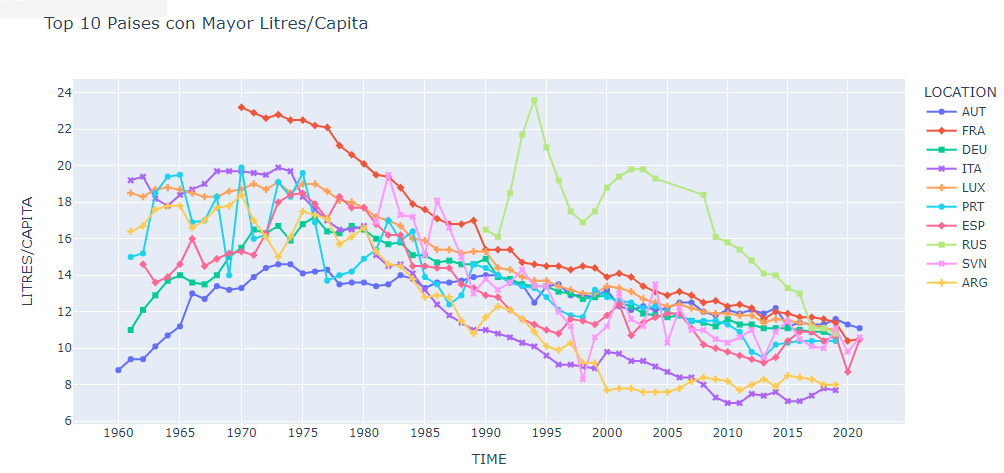